# Simulation Examples

First we must do some setup

In [1]:
import chimeric_tools.Simulation as ctc
import chimeric_tools.Data as ctd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

import warnings
warnings.filterwarnings('ignore')

### Simple Cases Simulation

First we are going to do a simple simulation. We are going to simulate 1000 US cases with a block length of 5

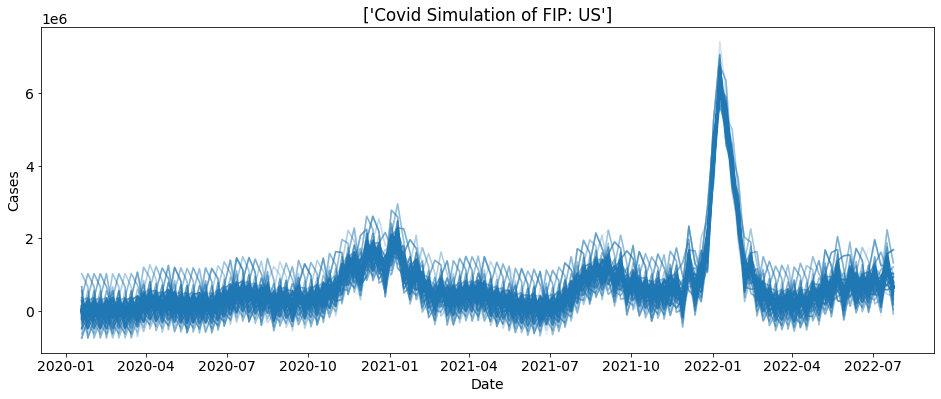

In [2]:
reps = 1000
bs = ctc.COVID(geo_values = "US", include = ["cases"]).simulate(block_length = 5, reps = reps)
for i in range(reps):
    sub_data = bs.loc[bs.sim==i]
    plt.plot(sub_data.date, sub_data.cases, alpha = 0.1, color = "tab:blue")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Covid Simulation of FIP: " + bs.location.unique())
plt.show()

We can also plot the real cases count on-top of this plot to help visualize the simulation.

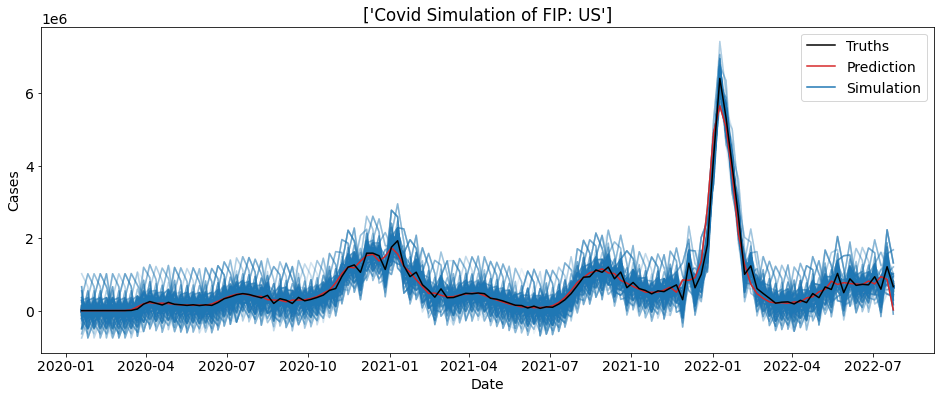

In [3]:
reps = 1000
sim = ctc.COVID(geo_values = "US", include = ["cases"])
bs = sim.simulate(5, 1000)
truth_data = sim.data
for i in range(reps):
    sub_data = bs.loc[bs.sim==i]
    plt.plot(sub_data.date, sub_data.cases, alpha = 0.1, color = "tab:blue")
plt.plot(truth_data.date, truth_data.cases, color= "tab:red")
plt.plot(truth_data.date, truth_data.preds_cases, color= "black")
plt.xlabel("Date")
plt.ylabel("Cases")
colors = ['black', 'tab:red', 'tab:blue']
lines = [Line2D([0], [0], color=c) for c in colors]
labels = ['Truths', 'Prediction', 'Simulation']
plt.legend(lines, labels)
plt.title("Covid Simulation of FIP: " + bs.location.unique())
plt.show()

### Bootstrapping from many FIPS
#### Uniform Random

You can also bootstrap using many FIPS of your choosing. Here each fip is chooses using uniform random with replacement.

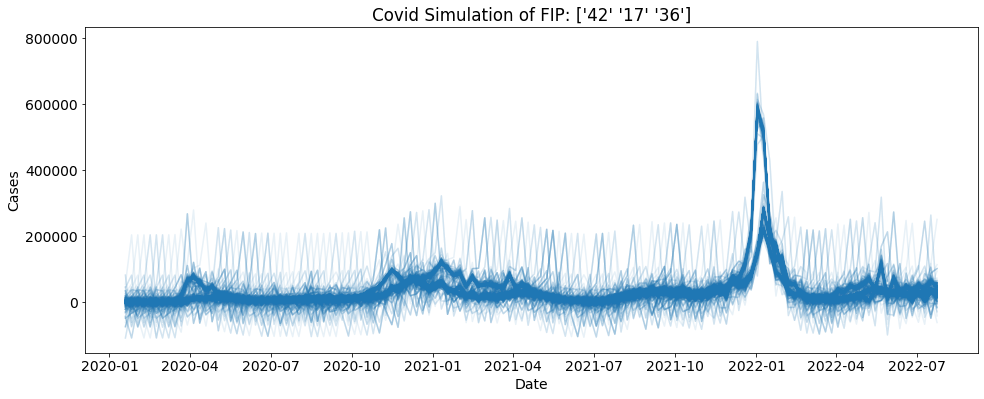

In [4]:
geo_values = ["42", "17", "06", "36"]
reps = 1000
sim = ctc.COVID(geo_values = geo_values, include = ["cases"])
bs = sim.simulate(5, 1000)
for i in range(reps):
    sub_data = bs.loc[bs.sim==i]
    plt.plot(sub_data.date, sub_data.cases, alpha = 0.1, color = "tab:blue")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Covid Simulation of FIP: " + str(bs.location.unique()))
plt.show()

#### Weighted Random

Here we can use weights in the form of a dictionary to choose the FIPS. As you can see 42 is weighted a lot higher than the other states. This is reflected in the graph. You can see that one trend is significantly darker than the others, telling us it has been picked more. 

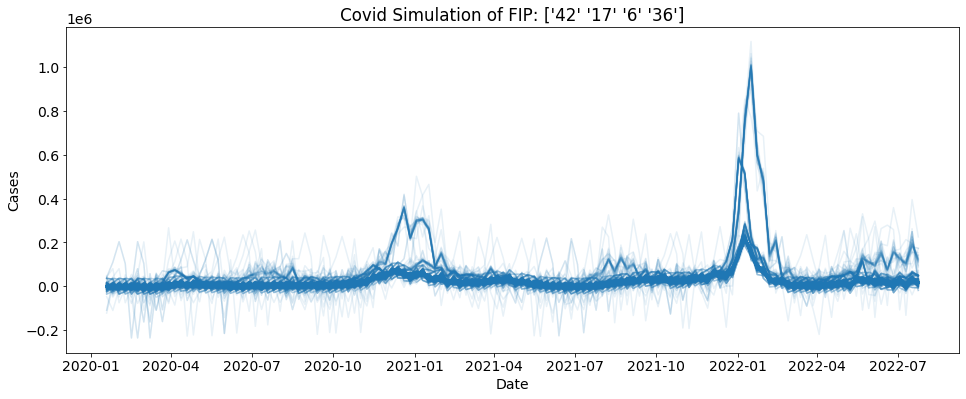

In [5]:
geo_values = {"42":0.9, "17":0.033, "6":0.033, "36":0.034}
reps = 1000
sim = ctc.COVID(geo_values = geo_values, include = ["cases"])
bs = sim.simulate(5, 1000)
for i in range(reps):
    sub_data = bs.loc[bs.sim==i]
    plt.plot(sub_data.date, sub_data.cases, alpha = 0.1, color = "tab:blue")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Covid Simulation of FIP: " + str(bs.location.unique()))
plt.show()